age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
58,0,3,150,283,1,0,162,0,1,2,0,2,1
50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
58,0,2,120,340,0,1,172,0,0,2,0,2,1
66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
42,1,0,140,226,0,1,178,0,0,2,0,2,1
61,1,2,150,243,1,1,137,1,1,1,0,2,1
40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
71,0,

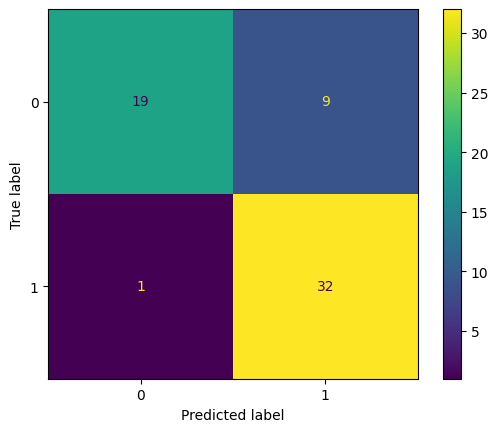

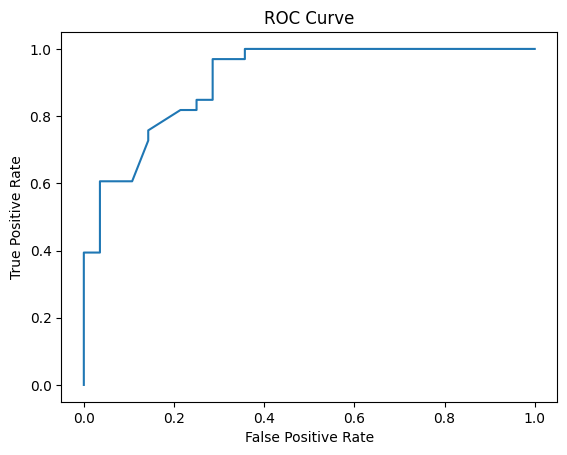

['heart_disease_predictor.pkl']

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt
import joblib
import requests
import io

# Load the Cleveland Heart Disease dataset
url = "https://drive.usercontent.google.com/download?id=1-6dPDup5aYIRuJGrw60cSTnL2jtm9P__&export=download&authuser=0"

# Download the CSV file from the URL
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

print(response.text)

column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(io.StringIO(response.text), na_values="?")

# Data Preprocessing
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)
X = data.drop("target", axis=1)
y = data["target"].apply(lambda x: 1 if x > 0 else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Save Model
joblib.dump(model, "heart_disease_predictor.pkl")
